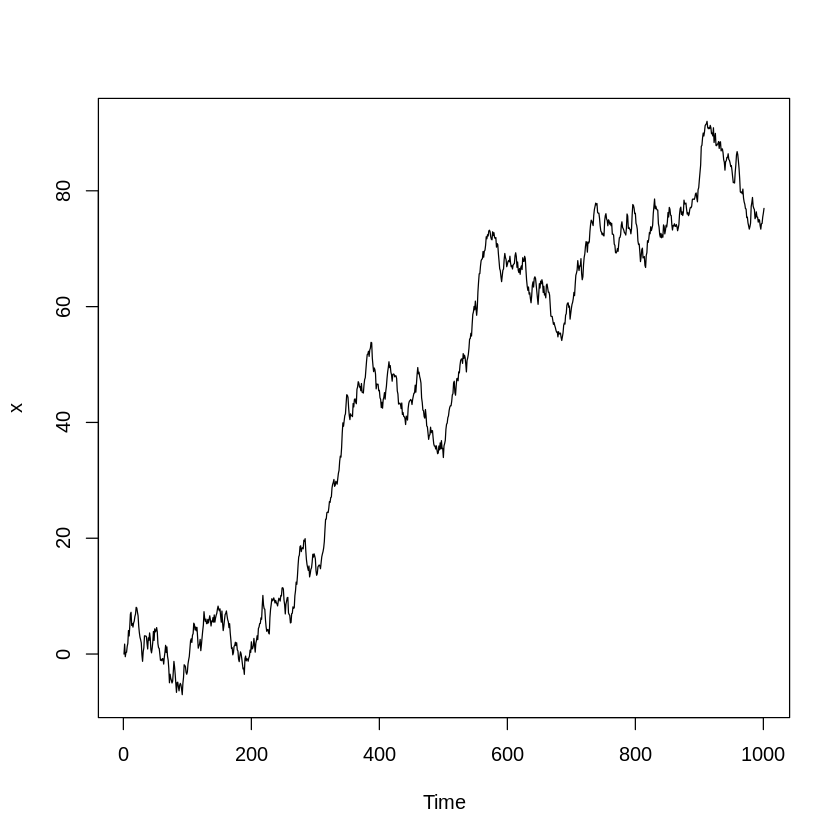

In [8]:
## https://www.quantstart.com/articles/Autoregressive-Integrated-Moving-Average-ARIMA-p-d-q-Models-for-Time-Series-Analysis/
set.seed(2)
x <- arima.sim(list(order = c(1,1,1), ar = 0.6, ma=-0.5), n = 1000)
plot(x)

In [9]:
x.arima <- arima(x, order=c(1, 1, 1))
coef(x.arima)[1] + c(-1.96, 1.96)*sqrt(diag(vcov(x.arima))[1]) 
coef(x.arima)[2] + c(-1.96, 1.96)*sqrt(diag(vcov(x.arima))[2]) 

[1] 0.4382411 0.8558227

[1] -0.7495459 -0.2834130

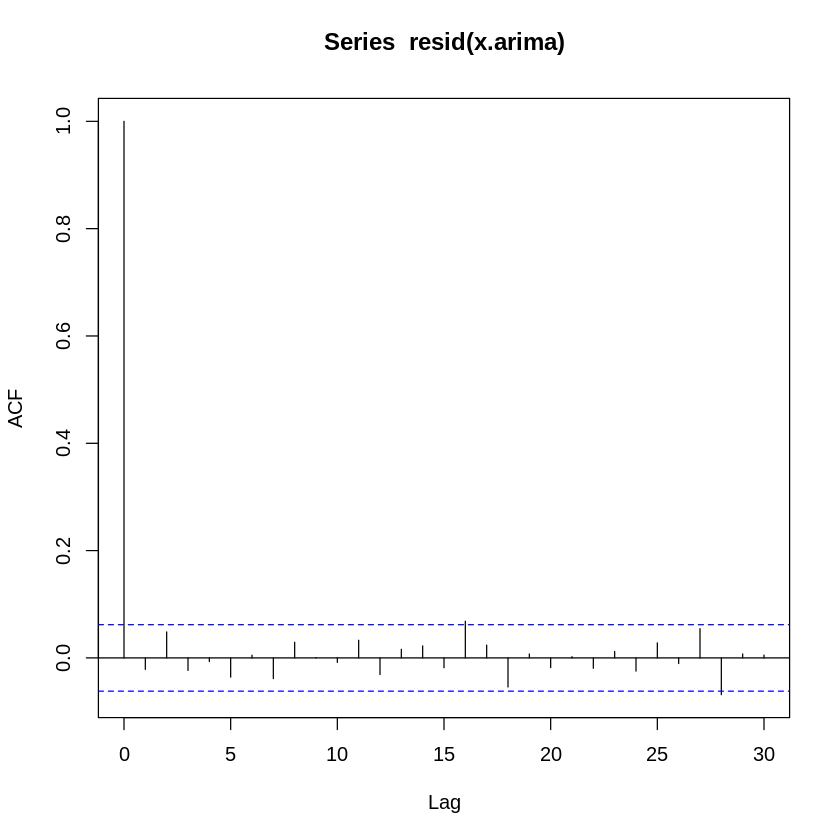

In [10]:
acf(resid(x.arima))

In [11]:
Box.test(resid(x.arima), lag=20, type="Ljung-Box")


	Box-Ljung test

data:  resid(x.arima)
X-squared = 19.041, df = 20, p-value = 0.5191


In [1]:
library(forecast)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Registered S3 methods overwritten by 'forecast':
  method             from    
  fitted.fracdiff    fracdiff
  residuals.fracdiff fracdiff


In [2]:
require(quantmod)
getSymbols("AMZN", from="2013-01-01")
amzn = diff(log(Cl(AMZN)))
azfinal.aic <- Inf
azfinal.order <- c(0,0,0)
for (p in 1:4) for (d in 0:1) for (q in 1:4) {
  azcurrent.aic <- AIC(arima(amzn, order=c(p, d, q)))
  if (azcurrent.aic < azfinal.aic) {
    azfinal.aic <- azcurrent.aic
    azfinal.order <- c(p, d, q)
    azfinal.arima <- arima(amzn, order=azfinal.order)
  }
}
azfinal.order

Loading required package: quantmod
Loading required package: xts
Warning message:
“package ‘xts’ was built under R version 3.6.2”Loading required package: zoo
Warning message:
“package ‘zoo’ was built under R version 3.6.2”
Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: TTR
Warning message:
“package ‘TTR’ was built under R version 3.6.2”Version 0.4-0 included new data defaults. See ?getSymbols.
‘getSymbols’ currently uses auto.assign=TRUE by default, but will
use auto.assign=FALSE in 0.5-0. You will still be able to use
‘loadSymbols’ to automatically load data. getOption("getSymbols.env")
and getOption("getSymbols.auto.assign") will still be checked for
alternate defaults.

This message is shown once per session and may be disabled by setting 
options("getSymbols.warning4.0"=FALSE). See ?getSymbols for details.

Warning message:
“'indexClass<-' is deprecated.
Use 'tclass<-' instead.
See help("Depr

[1] "AMZN"

Warning message in arima(amzn, order = c(p, d, q)):
“possible convergence problem: optim gave code = 1”Warning message in arima(amzn, order = c(p, d, q)):
“possible convergence problem: optim gave code = 1”Warning message in arima(amzn, order = azfinal.order):
“possible convergence problem: optim gave code = 1”Warning message in log(s2):
“NaNs produced”Warning message in log(s2):
“NaNs produced”Warning message in log(s2):
“NaNs produced”Warning message in log(s2):
“NaNs produced”

[1] 3 0 3

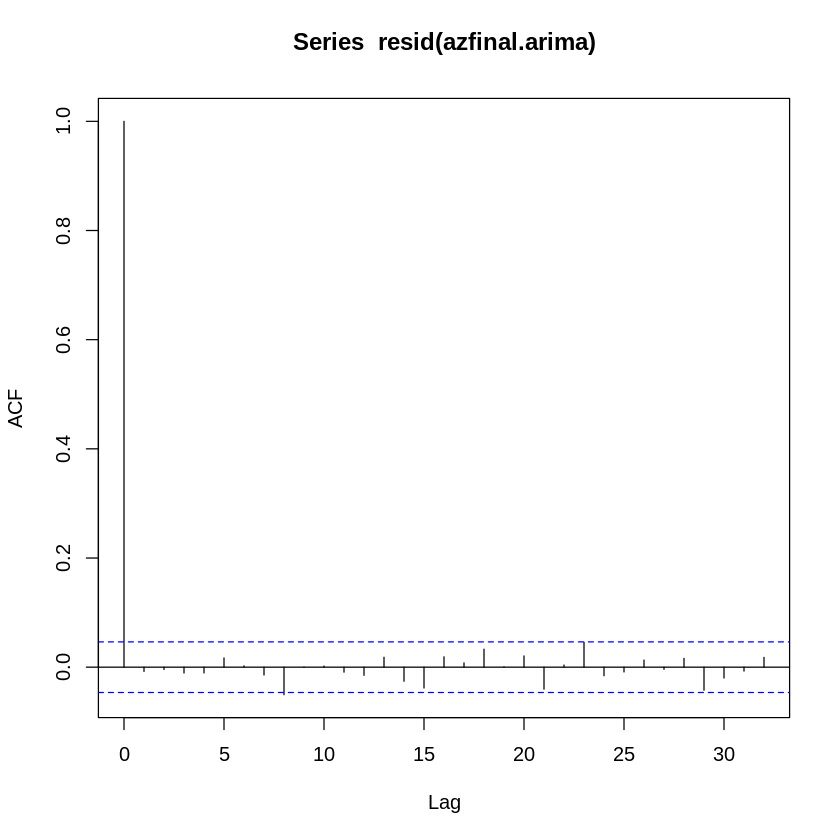

In [3]:
acf(resid(azfinal.arima), na.action=na.omit)

In [4]:
Box.test(resid(azfinal.arima), lag=20, type="Ljung-Box")


	Box-Ljung test

data:  resid(azfinal.arima)
X-squared = 14.473, df = 20, p-value = 0.8057


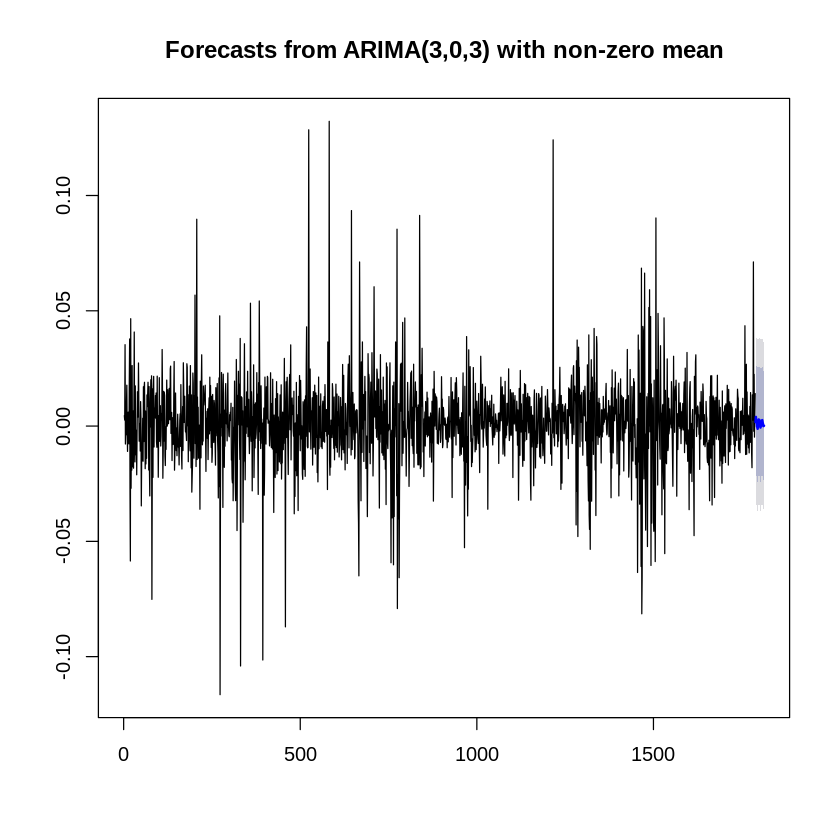

In [5]:
plot(forecast(azfinal.arima, h=25))

In [6]:
getSymbols("^GSPC", from="2013-01-01")
sp = diff(log(Cl(GSPC)))

Warning message:
“'indexClass<-' is deprecated.
Use 'tclass<-' instead.
See help("Deprecated") and help("xts-deprecated").”

[1] "^GSPC"

In [7]:
spfinal.aic <- Inf
spfinal.order <- c(0,0,0)
for (p in 1:4) for (d in 0:1) for (q in 1:4) {
  spcurrent.aic <- AIC(arima(sp, order=c(p, d, q)))
  if (spcurrent.aic < spfinal.aic) {
    spfinal.aic <- spcurrent.aic
    spfinal.order <- c(p, d, q)
    spfinal.arima <- arima(sp, order=spfinal.order)
  }
}
spfinal.order

Warning message in arima(sp, order = c(p, d, q)):
“possible convergence problem: optim gave code = 1”Warning message in log(s2):
“NaNs produced”Warning message in arima(sp, order = c(p, d, q)):
“possible convergence problem: optim gave code = 1”Warning message in log(s2):
“NaNs produced”Warning message in log(s2):
“NaNs produced”Warning message in arima(sp, order = c(p, d, q)):
“possible convergence problem: optim gave code = 1”

[1] 4 0 4

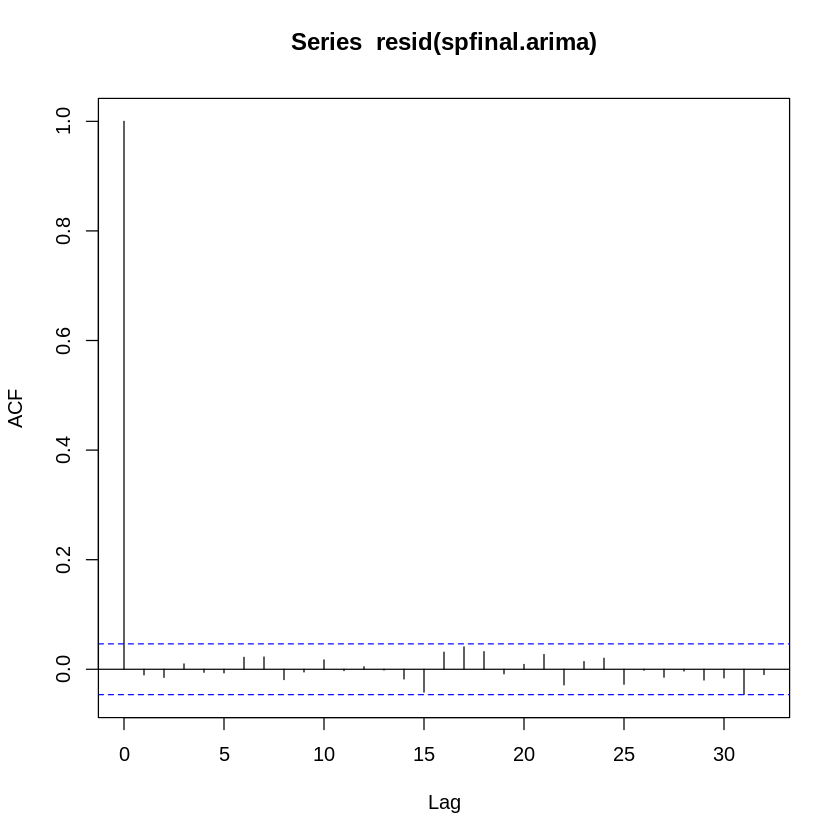

In [8]:
acf(resid(spfinal.arima), na.action=na.omit)

In [9]:
Box.test(resid(spfinal.arima), lag=20, type="Ljung-Box")


	Box-Ljung test

data:  resid(spfinal.arima)
X-squared = 14.458, df = 20, p-value = 0.8066


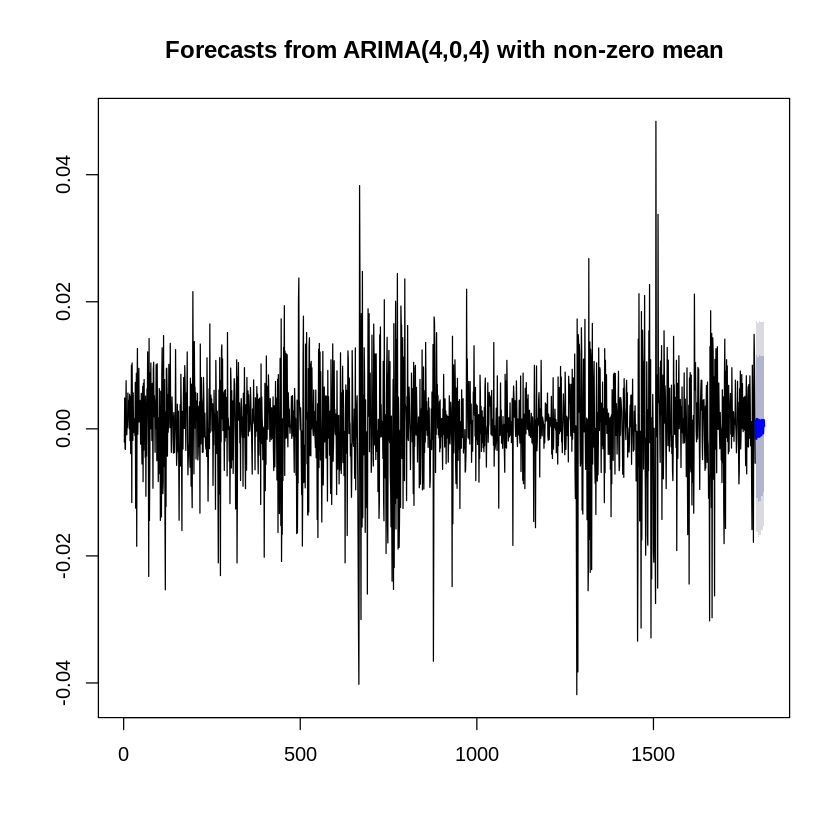

In [10]:
plot(forecast(spfinal.arima, h=25))